# **LAB 1 - PART 2**

- Data Exploration, Cleansing, and Transform
- Remove variables with High Variable Correlation
- Remove Variables with High p-value according to Chi-square


### Import tools


In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2 
from scipy.stats import chi2_contingency

## **1. Data Exploration**

Read the Data_example.csv files

<details>
<summary>
<font size="3" color="Yellow">
<b>Columns Information</b>
</font>
</summary>

</br>There are 25 variables:

- **ID**: ID of each client
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- **SEX**: Gender (M, F)
- **EDUCATION**: (graduate school, university, high school, others, unknown, unknown)
- **MARRIAGE**: Marital status (married, single, others)
- **AGE**: Age in years
- **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- **PAY_2**: Repayment status in August, 2005 (scale same as above)
- **PAY_3**: Repayment status in July, 2005 (scale same as above)
- **PAY_4**: Repayment status in June, 2005 (scale same as above)
- **PAY_5**: Repayment status in May, 2005 (scale same as above)
- **PAY_6**: Repayment status in April, 2005 (scale same as above)
- **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
- **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
- **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
- **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
- **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
- **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
- **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
- **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
- **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
- **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
- **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
- **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
- **default**: Default payment (Y, N)

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.read_csv()`
</details>


In [286]:
### START CODE HERE ###
df = None
# df = pd.read_csv('./Data_example.csv', encoding='utf-8')
df = pd.read_csv('./Credit-Card-Defaulter-Prediction.csv')
### END CODE HERE ###
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Single,24,2.0,2.0,-1.0,-1.0,...,0.0,NaN,NaN,NaN,689.0,0.0,0.0,0.0,0.0,Y
1,2,120000,F,University,Single,26,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,NaN,2000.0,Y
2,3,90000,F,University,Single,34,0.0,NaN,NaN,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,N
3,4,50000,F,University,Single,37,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,N
4,5,50000,M,University,Married,57,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,NaN,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,N
29996,29997,150000,M,High School,Married,43,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,NaN,N
29997,29998,30000,M,University,Single,37,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,Y
29998,29999,80000,M,High School,Married,41,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,Y


Remove column `ID`.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `df.drop()`
</details>


In [287]:
### START CODE HERE ###
df = df.drop(['ID'],axis=1)
### END CODE HERE ###
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,F,University,Single,24,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,NaN,NaN,NaN,689.0,0.0,0.0,0.0,0.0,Y
1,120000,F,University,Single,26,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,NaN,2000.0,Y
2,90000,F,University,Single,34,0.0,NaN,NaN,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,N
3,50000,F,University,Single,37,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,N
4,50000,M,University,Married,57,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,M,High School,Married,39,NaN,0.0,0.0,0.0,NaN,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,N
29996,150000,M,High School,Married,43,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,NaN,N
29997,30000,M,University,Single,37,4.0,3.0,2.0,-1.0,NaN,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,Y
29998,80000,M,High School,Married,41,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,Y


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- `Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
dtype='object')`

</details>


In [288]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default '],
      dtype='object')

#### Fill NA values

Before proceeding with filling missing values, it is crucial to comprehend the significance of each numerical column in the dataset. This understanding will guide the appropriate method for handling missing data in a way that aligns with the context and characteristics of each column.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.fillna()`
- Please explore the statistical values for each column (mean, median, min, max, etc.). Careful about column 'PAY_X'.
</details>


แสดงจำนวน NA ในแต่ละคอลัมน์


In [289]:
df.isna().sum()



LIMIT_BAL       0
SEX             0
EDUCATION       0
MARRIAGE        0
AGE             0
PAY_0        2228
PAY_2        2357
PAY_3        2410
PAY_4        2507
PAY_5        2492
PAY_6        2418
BILL_AMT1     266
BILL_AMT2     357
BILL_AMT3     430
BILL_AMT4     448
BILL_AMT5     560
BILL_AMT6     621
PAY_AMT1      794
PAY_AMT2      813
PAY_AMT3      901
PAY_AMT4      960
PAY_AMT5     1047
PAY_AMT6     1077
default         0
dtype: int64

ค่ามัธยฐาน ของ Column Pay_0 - 6


In [290]:
median_pay_0 = df['PAY_0'].median()
print("Median",median_pay_0)
print(df['PAY_0'].value_counts())
print("-"*50)
median_pay_2 = df['PAY_2'].median()
print("Median",median_pay_2)
print(df['PAY_2'].value_counts())
print("-"*50)
median_pay_3 = df['PAY_3'].median()
print("Median",median_pay_3)
print(df['PAY_3'].value_counts())
print("-"*50)
median_pay_4 = df['PAY_4'].median()
print("Median",median_pay_4)
print(df['PAY_4'].value_counts())
print("-"*50)
median_pay_5 = df['PAY_5'].median()
print("Median",median_pay_5)
print(df['PAY_5'].value_counts())
print("-"*50)
median_pay_6 = df['PAY_6'].median()
print("Median",median_pay_6)
print(df['PAY_6'].value_counts())
print("-"*50)



Median 0.0
PAY_0
 0.0    12509
-1.0     5686
 1.0     3688
-2.0     2759
 2.0     2667
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: count, dtype: int64
--------------------------------------------------
Median 0.0
PAY_2
 0.0    13373
-1.0     6050
 2.0     3927
-2.0     3782
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: count, dtype: int64
--------------------------------------------------
Median 0.0
PAY_3
 0.0    13354
-1.0     5938
-2.0     4085
 2.0     3819
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        3
Name: count, dtype: int64
--------------------------------------------------
Median 0.0
PAY_4
 0.0    13948
-1.0     5687
-2.0     4348
 2.0     3159
 3.0      180
 4.0       69
 7.0       58
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: count, dtype: int64
--------------------------------------------------
Median 0

ค่ามัธยฐาน ของ Column BILL_AMT_1 - 6


In [291]:
median_BILL_AMT1 = df['BILL_AMT1'].median()
print("median",median_BILL_AMT1 )
print(df['BILL_AMT1'].value_counts())
print("-"*50)
median_BILL_AMT2 = df['BILL_AMT2'].median()
print("median",median_BILL_AMT2 )
print(df['BILL_AMT2'].value_counts())
print("-"*50)
median_BILL_AMT3 = df['BILL_AMT3'].median()
print("median",median_BILL_AMT3 )
print(df['BILL_AMT3'].value_counts())
print("-"*50)
median_BILL_AMT4 = df['BILL_AMT4'].median()
print("median",median_BILL_AMT4 )
print(df['BILL_AMT4'].value_counts())
print("-"*50)
median_BILL_AMT5 = df['BILL_AMT5'].median()
print("median",median_BILL_AMT5 )
print(df['BILL_AMT5'].value_counts())
print("-"*50)
median_BILL_AMT6 = df['BILL_AMT6'].median()
print("median",median_BILL_AMT6 )
print(df['BILL_AMT6'].value_counts())
print("-"*50)

#sum count / 2

median 23020.5
BILL_AMT1
0.0         1742
390.0        244
780.0         76
326.0         72
316.0         63
            ... 
11636.0        1
146034.0       1
20817.0        1
1351.0         1
47929.0        1
Name: count, Length: 22723, dtype: int64
--------------------------------------------------
median 22063.0
BILL_AMT2
0.0        2149
390.0       231
326.0        75
780.0        75
316.0        72
           ... 
26357.0       1
85195.0       1
6889.0        1
11004.0       1
48905.0       1
Name: count, Length: 22346, dtype: int64
--------------------------------------------------
median 20670.5
BILL_AMT3
0.0         2440
390.0        275
780.0         74
326.0         63
316.0         62
            ... 
19580.0        1
45129.0        1
227807.0       1
39330.0        1
49764.0        1
Name: count, Length: 22026, dtype: int64
--------------------------------------------------
median 19411.5
BILL_AMT4
0.0         2747
390.0        246
780.0        101
316.0         68
326.0 

ค่ามัธยฐาน ของ Column PAY_AMT1 - 6


In [292]:
median_PAY_AMT1 = df['PAY_AMT1'].median()
print("median",median_PAY_AMT1 )
print(df['PAY_AMT1'].value_counts())
print("-"*50)

median_PAY_AMT2 = df['PAY_AMT2'].median()
print("median",median_PAY_AMT2 )
print(df['PAY_AMT2'].value_counts())
print("-"*50)

median_PAY_AMT3 = df['PAY_AMT3'].median()
print("median",median_PAY_AMT3 )
print(df['PAY_AMT3'].value_counts())
print("-"*50)

median_PAY_AMT4 = df['PAY_AMT4'].median()
print("median",median_PAY_AMT4 )
print(df['PAY_AMT4'].value_counts())
print("-"*50)

median_PAY_AMT5 = df['PAY_AMT5'].median()
print("median",median_PAY_AMT5 )
print(df['PAY_AMT5'].value_counts())
print("-"*50)

median_PAY_AMT6 = df['PAY_AMT6'].median()
print("median",median_PAY_AMT6 )
print(df['PAY_AMT6'].value_counts())
print("-"*50)

median 2219.5
PAY_AMT1
0.0        4455
2000.0     1363
3000.0      891
5000.0      698
1500.0      507
           ... 
3391.0        1
7785.0        1
66022.0       1
10121.0       1
85900.0       1
Name: count, Length: 7943, dtype: int64
--------------------------------------------------
median 2100.0
PAY_AMT2
0.0        4583
2000.0     1290
3000.0      857
5000.0      717
1000.0      594
           ... 
7866.0        1
6206.0        1
10529.0       1
21300.0       1
3526.0        1
Name: count, Length: 7899, dtype: int64
--------------------------------------------------
median 2000.0
PAY_AMT3
0.0        5067
2000.0     1285
1000.0     1103
3000.0      870
5000.0      721
           ... 
5102.0        1
5368.0        1
28138.0       1
549.0         1
25128.0       1
Name: count, Length: 7518, dtype: int64
--------------------------------------------------
median 1600.0
PAY_AMT4
0.0        5448
1000.0     1394
2000.0     1214
3000.0      887
5000.0      810
           ... 
18916.0    

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  object 
 2   EDUCATION  30000 non-null  object 
 3   MARRIAGE   30000 non-null  object 
 4   AGE        30000 non-null  int64  
 5   PAY_0      27772 non-null  float64
 6   PAY_2      27643 non-null  float64
 7   PAY_3      27590 non-null  float64
 8   PAY_4      27493 non-null  float64
 9   PAY_5      27508 non-null  float64
 10  PAY_6      27582 non-null  float64
 11  BILL_AMT1  29734 non-null  float64
 12  BILL_AMT2  29643 non-null  float64
 13  BILL_AMT3  29570 non-null  float64
 14  BILL_AMT4  29552 non-null  float64
 15  BILL_AMT5  29440 non-null  float64
 16  BILL_AMT6  29379 non-null  float64
 17  PAY_AMT1   29206 non-null  float64
 18  PAY_AMT2   29187 non-null  float64
 19  PAY_AMT3   29099 non-null  float64
 20  PAY_AM

In [294]:
### START CODE HERE ###
test = df.copy()
# median_values = test.median()
# df_filled = df.fillna(median_values)
# test
mode_values = test.mode().iloc[0]
df_filled = df.fillna(mode_values)
df_filled

### END CODE HERE ###

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,F,University,Single,24,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Y
1,120000,F,University,Single,26,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Y
2,90000,F,University,Single,34,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,N
3,50000,F,University,Single,37,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,N
4,50000,M,University,Married,57,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,M,High School,Married,39,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,N
29996,150000,M,High School,Married,43,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,N
29997,30000,M,University,Single,37,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,Y
29998,80000,M,High School,Married,41,1.0,-1.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,Y


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  float64
 6   PAY_2      30000 non-null  float64
 7   PAY_3      30000 non-null  float64
 8   PAY_4      30000 non-null  float64
 9   PAY_5      30000 non-null  float64
 10  PAY_6      30000 non-null  float64
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AMT4   30000 non-null  float64
 21  PAY_AMT5   30000 non-null  float64
 22  PAY_AMT6   30000 non-null  float64
 23  default    30000 non-null  object
dtypes: float64(18), int64(2), object(4)
memory usage: 5.5+ MB
```

</details>


In [295]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  object 
 2   EDUCATION  30000 non-null  object 
 3   MARRIAGE   30000 non-null  object 
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  float64
 6   PAY_2      30000 non-null  float64
 7   PAY_3      30000 non-null  float64
 8   PAY_4      30000 non-null  float64
 9   PAY_5      30000 non-null  float64
 10  PAY_6      30000 non-null  float64
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

## **2. Remove variables with High Variable Correlation**


Calculate the correlation of the numerical columns.

$$
\rho_{X,Y} = \frac{\text{cov}(X, Y)}{\sigma_X \sigma_Y}
$$


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Retrieve the numerical columns first, and then calculate the correlation.
- `.corr()`
</details>


In [296]:
### START CODE HERE ###

# correlation_matrix = df_filled.corr()

non_numeric_columns = df_filled.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns
df_numeric = df_filled.drop(columns=non_numeric_columns)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>

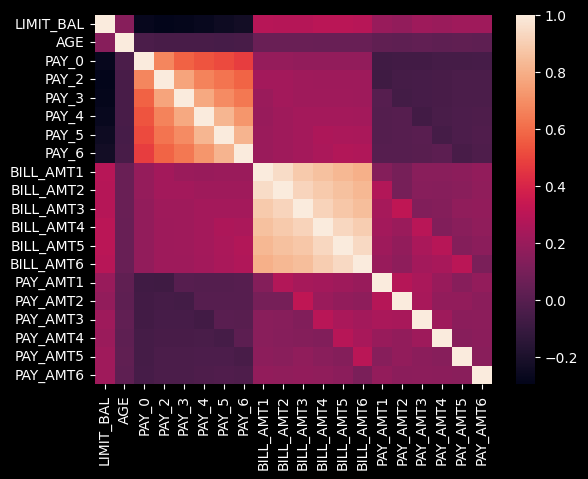

</details>


<Axes: >

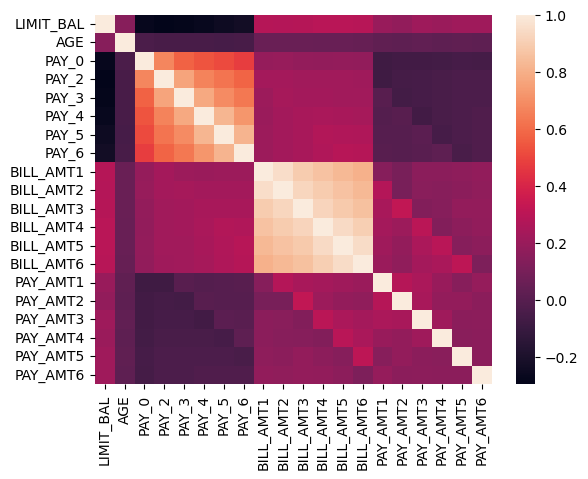

In [297]:
sns.heatmap(correlation_matrix)

Extract the lower triangular part of the correlation matrix.

<details>
<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `np.tril()` migth be useful here.
</details>


In [298]:
### START CODE HERE ###
# lower = np.tril(correlation_matrix)
lower = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>

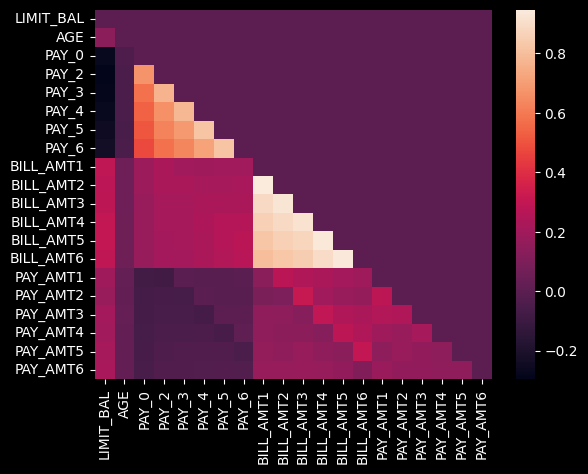

</details>


<Axes: >

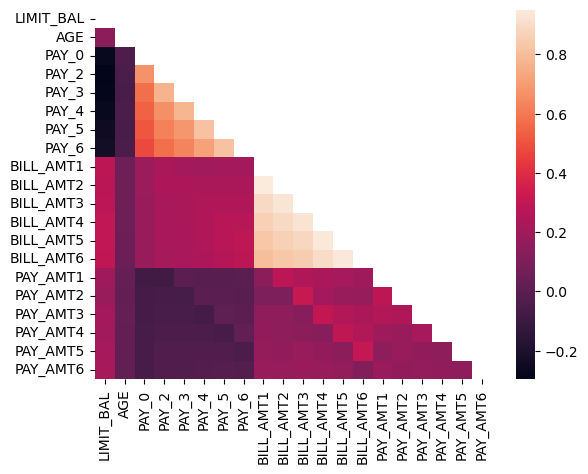

In [299]:
sns.heatmap(lower)

Drop the input variables (columns) that have high correlation (too similar) > 0.6.
(high correlation = large similarity)


In [300]:
### START CODE HERE ###
to_drop =[column for column in lower.columns if any(lower[column] > 0.6)]
df_filled.drop(to_drop, axis=1, inplace=True)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>

|       | LIMIT_BAL | AGE   | PAY_6 | BILL_AMT6 | PAY_AMT1 | PAY_AMT2  | PAY_AMT3 | PAY_AMT4 | PAY_AMT5 | PAY_AMT6 |
| ----- | --------- | ----- | ----- | --------- | -------- | --------- | -------- | -------- | -------- | -------- |
| count | 30000.0   | 30000 | 30000 | 30000.0   | 30000    | 30000     | 30000    | 30000    | 30000    | 30000    |
| mean  | 167484.32 | 35.49 | -0.29 | 39693.41  | 5817.55  | 6086.10   | 5387.49  | 4985.62  | 4972.94  | 5409.71  |
| std   | 129747.66 | 9.22  | 1.15  | 59285.34  | 16536.93 | 23019.67  | 17582.93 | 15641.57 | 15251.02 | 17748.95 |
| min   | 10000.0   | 21    | -2.0  | -339603.0 | 0        | 0         | 0        | 0        | 0        | 0        |
| 25%   | 50000.0   | 28    | -1.0  | 1760.0    | 1125.0   | 1000.0    | 614.75   | 416.0    | 412.0    | 389.0    |
| 50%   | 140000.0  | 34    | 0.0   | 18480.5   | 2400.0   | 2200.5    | 2000.0   | 1770.5   | 1880.0   | 1800.0   |
| 75%   | 240000.0  | 41    | 0.0   | 49198.25  | 5700.0   | 5433.0    | 5000.0   | 4985.62  | 4972.94  | 5000.0   |
| max   | 1000000.0 | 79    | 8.0   | 961664.0  | 873552.0 | 1684259.0 | 896040.0 | 621000.0 | 426529.0 | 528666.0 |

</details>


In [301]:
df_filled.describe()

,LIMIT_BAL,AGE,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.291100,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,1.149988,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-2.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,0.000000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## **3. Remove Variables with High p-values from Chi-square**


Data Exploration, Cleansing, and Transform

1. List of variation in each column (`.unique()`)
2. Replace '0' and NaN
3. Explore data statistics


check


In [302]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  object 
 2   EDUCATION  30000 non-null  object 
 3   MARRIAGE   30000 non-null  object 
 4   AGE        30000 non-null  int64  
 5   PAY_6      30000 non-null  float64
 6   BILL_AMT6  30000 non-null  float64
 7   PAY_AMT1   30000 non-null  float64
 8   PAY_AMT2   30000 non-null  float64
 9   PAY_AMT3   30000 non-null  float64
 10  PAY_AMT4   30000 non-null  float64
 11  PAY_AMT5   30000 non-null  float64
 12  PAY_AMT6   30000 non-null  float64
 13  default    30000 non-null  object 
dtypes: float64(8), int64(2), object(4)
memory usage: 3.2+ MB


In [303]:
### START CODE HERE ###

# List of variation in each column
unique_variations = df_filled.apply(lambda x: x.unique())

# Replace '0' and NaN
df_filled.replace({'0': np.nan, 0: np.nan}, inplace=True)

# Explore data statistics
data_statistics = df_filled.describe()

# Identify non-numeric columns
non_numeric_columns = df_filled.select_dtypes(exclude='number').columns



### END CODE HERE ###

Label encoding the string columns.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details>


In [304]:
### START CODE HERE ###


# # Identify string columns
# string_columns = df_filled.select_dtypes(include='object').columns

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Apply label encoding to each string column
# df_filled[string_columns] = df_filled[string_columns].apply(lambda col: label_encoder.fit_transform(col))






# # Identify string columns
# string_columns = df_filled.select_dtypes(include='object').columns

# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Apply label encoding to each string column
# df_filled[string_columns] = df_filled[string_columns].apply(lambda col: label_encoder.fit_transform(col))


### END CODE HERE ###

In [305]:
df_filled_copy = df_filled.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate ทุก column และทำ Label Encoding พร้อมกับกำหนดค่า NaN
for column in df_filled_copy.columns:
    # ทำ Label Encoding ใน column ที่เป็น object
    if df_filled_copy[column].dtype == 'object':
        df_filled_copy[column] = label_encoder.fit_transform(df_filled_copy[column].astype(str))
        
    # กำหนดค่า NaN ในทุก column
    df_filled_copy[column].fillna(df_filled_copy[column].mean(), inplace=True)

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_6      30000 non-null  float64
 6   BILL_AMT6  30000 non-null  float64
 7   PAY_AMT1   30000 non-null  float64
 8   PAY_AMT2   30000 non-null  float64
 9   PAY_AMT3   30000 non-null  float64
 10  PAY_AMT4   30000 non-null  float64
 11  PAY_AMT5   30000 non-null  float64
 12  PAY_AMT6   30000 non-null  float64
 13  default    30000 non-null  int64
dtypes: float64(8), int64(6)
memory usage: 3.2 MB
```

</details>


In [306]:
# df_filled.info()
df_filled_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  int64  
 1   SEX        30000 non-null  int32  
 2   EDUCATION  30000 non-null  int32  
 3   MARRIAGE   30000 non-null  int32  
 4   AGE        30000 non-null  int64  
 5   PAY_6      30000 non-null  float64
 6   BILL_AMT6  30000 non-null  float64
 7   PAY_AMT1   30000 non-null  float64
 8   PAY_AMT2   30000 non-null  float64
 9   PAY_AMT3   30000 non-null  float64
 10  PAY_AMT4   30000 non-null  float64
 11  PAY_AMT5   30000 non-null  float64
 12  PAY_AMT6   30000 non-null  float64
 13  default    30000 non-null  int32  
dtypes: float64(8), int32(4), int64(2)
memory usage: 2.7 MB


### **Calcualte Chi-Square and P-value**

$$
\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
$$

$$
\text{p-value} = P(\chi^2 \mid \text{degrees of freedom})
$$

Show the output in the DataFrame where the output is `default `.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

| Feature   | Chi2 Statistic | P-Value      |
| --------- | -------------- | ------------ |
| SEX       | 28.922107      | 7.534804e-08 |
| EDUCATION | 41.628348      | 1.103811e-10 |
| MARRIAGE  | 2.646896       | 1.037523e-01 |

</details>


In [327]:
print(df_filled_copy.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_6',
       'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default '],
      dtype='object')


In [328]:
from sklearn.feature_selection import chi2

# Assuming your data is in a DataFrame named df_filled_copy
selected_features = ['SEX', 'EDUCATION', 'MARRIAGE']  # Add the features you want to analyze
output_features = df_filled_copy[selected_features]  # Features
target_variable = df_filled_copy['default ']  # Target variable

# Ensure non-negativity by taking the absolute value
output_features = output_features.abs()

# Perform the chi-squared test
chi2_stat, p_values = chi2(output_features, target_variable)

# Create a DataFrame from the results
chi2_table = pd.DataFrame({
    "Feature": output_features.columns,
    "Chi2 Statistic": chi2_stat,
    "P-Value": p_values
})

# Display the table
chi2_table


,Feature,Chi2 Statistic,P-Value
0,SEX,28.922107,7.534804e-08
1,EDUCATION,40.736177,1.742316e-10
2,MARRIAGE,2.643561,1.039703e-01


| Feature   | Chi2 Statistic | P-Value      |
| --------- | -------------- | ------------ |
| SEX       | 28.922107      | 7.534804e-08 |
| EDUCATION | 41.628348      | 1.103811e-10 |
| MARRIAGE  | 2.646896       | 1.037523e-01 |


Drop the columns where `p-value` is more than 0.05.


In [331]:
### START CODE HERE ###
to_drop = chi2_table[chi2_table['P-Value'] > 0.05]['Feature'].tolist()
print("to_drop :",to_drop)
df_filled_copy.drop(columns=to_drop, inplace=True)
### END CODE HERE ###

to_drop : ['MARRIAGE']


## Visualize the final version of DataFrame


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your `.fillna()` method.</br>
  </br>

| LIMIT_BAL | SEX | EDUCATION | AGE | PAY_6 | BILL_AMT6 | PAY_AMT1 | PAY_AMT2 | PAY_AMT3 | PAY_AMT4 | PAY_AMT5 | PAY_AMT6 | default |
| --------- | --- | --------- | --- | ----- | --------- | -------- | -------- | -------- | -------- | -------- | -------- | ------- |
| 20000     | 0   | 3         | 24  | -2.0  | 39693.41  | 5817.55  | 689.0    | 0.0      | 0.0      | 0.0      | 0.0      | 1       |
| 120000    | 0   | 3         | 26  | 2.0   | 3261.0    | 0.0      | 1000.0   | 1000.0   | 1000.0   | 4972.94  | 2000.0   | 1       |
| 90000     | 0   | 3         | 34  | 0.0   | 15549.0   | 1518.0   | 1500.0   | 1000.0   | 1000.0   | 1000.0   | 5000.0   | 0       |
| 50000     | 0   | 3         | 37  | 0.0   | 29547.0   | 2000.0   | 2019.0   | 1200.0   | 1100.0   | 1069.0   | 1000.0   | 0       |
| 50000     | 1   | 3         | 57  | 0.0   | 19131.0   | 2000.0   | 36681.0  | 10000.0  | 9000.0   | 689.0    | 679.0    | 0       |
| ...       | ... | ...       | ... | ...   | ...       | ...      | ...      | ...      | ...      | ...      | ...      | ...     |
| 220000    | 1   | 1         | 39  | 0.0   | 15980.0   | 8500.0   | 20000.0  | 5003.0   | 3047.0   | 5000.0   | 1000.0   | 0       |
| 150000    | 1   | 1         | 43  | 0.0   | 0.0       | 1837.0   | 3526.0   | 8998.0   | 129.0    | 0.0      | 5409.71  | 0       |
| 30000     | 1   | 3         | 37  | 0.0   | 19357.0   | 0.0      | 0.0      | 22000.0  | 4200.0   | 2000.0   | 3100.0   | 1       |
| 80000     | 1   | 1         | 41  | -1.0  | 48944.0   | 85900.0  | 3409.0   | 1178.0   | 1926.0   | 52964.0  | 1804.0   | 1       |
| 50000     | 1   | 3         | 46  | 0.0   | 15313.0   | 2078.0   | 1800.0   | 1430.0   | 1000.0   | 1000.0   | 1000.0   | 1       |

</details>


In [334]:
df_filled_copy.round(1)

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,0,3,24,-2.0,44886.6,6864.7,689.0,6523.4,6136.9,6180.3,6854.4,1
1,120000,0,3,26,2.0,3261.0,6864.7,1000.0,1000.0,1000.0,6180.3,2000.0,1
2,90000,0,3,34,-0.6,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000,0,3,37,-0.6,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000,1,3,57,-0.6,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,1,39,-0.6,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000,1,1,43,-0.6,44886.6,1837.0,3526.0,8998.0,129.0,6180.3,6854.4,0
29997,30000,1,3,37,-0.6,19357.0,6864.7,7219.8,22000.0,4200.0,2000.0,3100.0,1
29998,80000,1,1,41,-1.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
